## Portfolio Optimization Problem


#### Problem Description

This is a simplified example of a portfolio optimization problem. If you are interested in how portfolio optimization works in detail check out these resources:

https://towardsdatascience.com/a-beginners-guide-to-data-science-in-the-portfolio-management-process-56d559a3d39

https://towardsdatascience.com/the-science-of-portfolio-optimization-186607d30416

For this assignment we will imagine that we have collected all the necessary information to optimize asset allocation.

**Description**

Imagine you are an investor with a budget. You want to invest this budget in a portfolio consisting of $N$ different assets (stocks or any other asset that is expected to gain in value over time). Each asset has an expected return and a risk associated with it. Your objective is to maximize the expected return while keeping the portfolio risk below a certain threshold. Additionally, you want to ensure that no single asset takes up more than 40% of the total investment.

What makes this problem challenging is that asset risks are correlated, i.e. investing in two assets might mean that their returns follow each other. For example: stocks of two cryptocurrency companies will crash together if the whole market crashes.

**Task:**

Imagine we have 5 assets to invest in.
Asset 1:
 - Expected Return: 12%
 - Risk (Standard Deviation): 15%

Asset 2:
 - Expected Return: 8%
 - Risk (Standard Deviation): 10%

Asset 3:
 - Expected Return: 10%
 - Risk (Standard Deviation): 12%

Asset 4:
 - Expected Return: 6%
 - Risk (Standard Deviation): 8%

Asset 5:
 - Expected Return: 14%
 - Risk (Standard Deviation): 20%


 We also have a risk covariance matrix:

 ```python
covariance_matrix = np.array([
    [0.0225, 0.003, 0.0025, 0.0015, 0.004],
    [0.003, 0.01, 0.002, 0.001, 0.003],
    [0.0025, 0.002, 0.0144, 0.0012, 0.0028],
    [0.0015, 0.001, 0.0012, 0.0064, 0.0015],
    [0.004, 0.003, 0.0028, 0.0015, 0.04]
])
 ```

**Objective:**
The objective is to find a vector of allocation values $w$ (how much of the budget should go to each asset) to maximize the expected return of the entire investment portfolio, while respecting risk constraints.

Parameters

$w$: Vector of weights representing the proportion of the total budget allocated to each asset.

$r$: Vector of expected returns for each asset.

$Σ$: Covariance matrix of the asset returns.

$λ$: Risk-aversion parameter, where higher values indicate greater aversion to risk.

The expected return of the portfolio is:
$E(R_p)=\mathbf{w}^T\mathbf{r}$

The variance (risk) of the portfolio is:
$σ_p^2=\mathbf{w}^TΣ\mathbf{w}$

The fitness function $F(w)$ that combines return and risk can be defined as:
$F(w)=E(R_p)-λ⋅σ_p^2$

or, equivalently:
$F(w)=\mathbf{w}^T\mathbf{r}-λ⋅\mathbf{w}^TΣ\mathbf{w}$


**Constraints:**

The weights must sum to 1 (i.e., the total budget must be fully allocated):
$\sum_{i=1}^{n}w_i=1$

No single asset should account for more than 40% of the total budget:
$w_i≤0.4$ for all $i$

The portfolio risk (standard deviation) should be below a certain threshold (if applicable):
$\mathbf{w}^TΣ\mathbf{w}≤threshold$

## Fitness function evaluating porfolio return with constraints

In [2]:
import numpy as np

# Define the parameters
expected_returns = np.array([0.12, 0.08, 0.10, 0.06, 0.14])
covariance_matrix = np.array([
    [0.0225, 0.003, 0.0025, 0.0015, 0.004],
    [0.003, 0.01, 0.002, 0.001, 0.003],
    [0.0025, 0.002, 0.0144, 0.0012, 0.0028],
    [0.0015, 0.001, 0.0012, 0.0064, 0.0015],
    [0.004, 0.003, 0.0028, 0.0015, 0.04]
])
risk_aversion = 1.0  # Example risk-aversion parameter
max_risk_threshold = 0.12  # Example risk threshold


# Define the fitness function
def fitness(weights):
    # Normalize weights to sum to 1
    weights = weights / np.sum(weights)

    # Calculate expected return
    portfolio_return = np.dot(weights, expected_returns)

    # Calculate portfolio risk (variance)
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))

    # Calculate fitness
    fitness_value = portfolio_return - risk_aversion * portfolio_variance

    if portfolio_variance > max_risk_threshold or np.any(weights > 0.4):
        fitness_value = -np.inf

    return fitness_value

# Example weights (randomly chosen, should be optimized)
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# Calculate the fitness value
fitness_value = fitness(weights)
print("Fitness Value:", fitness_value)


Fitness Value: 0.09446800000000002




The solution should look like:

```
Total return: some_value
Allocation: [permutation of job indices]
```

> I assume that i should not print a permutation of job indices but rather a permutation of weights?
> For that reason the solution that i will print is the following:
>
> ```
> Total return: some_value
> Weights: [permutation of weights]
> ``` 

## Implement the algorithm
make sure to comment on the code. This problem can be approximated with a genetic algorithm, ant colony optimization, simmulated annealing, etc.

In [3]:
import time 

np.random.seed(42)  # For reproducibility
investment_target_sum = 1.0
single_investment_limit = 0.4  # Maximum weight for a single investment


### Simulated Annealing

The `create_neighbor_solution` keeps iterating until it finds a solution that accepts the criteria stated in the assignment description. 

It creates a new solution by copying the weights getting the weight that should have its value changed, and picks a value between -0,1 and 0,1. By changing it, we then ensure that the value is not above 0 and 1 and further normalizes the weight array in order to ensure that all values sum up to 1. 

Before returning we ensure that the new set of weights meets the target sum of 1 and that there is not one single weight that is above the investment limit og 0,4.

In [4]:
def create_neighbor_solution(weights):
    # Create a copy of the weights to modify

    has_found_valid_solution = False

    while not has_found_valid_solution:
        new_weights = weights.copy()

        # Randomly select an index to perturb

        index = np.random.randint(0, len(new_weights))
        perturbation = np.random.uniform(-0.1, 0.1)
        new_weights[index] += perturbation

        # Clip the weights to ensure they are valid
        new_weights = np.clip(new_weights, 0, 1)
        new_weights /= np.sum(new_weights)  # Normalize weights to make sure they sum to 1

        # Validate the new weights pass the constraints
        if np.sum(new_weights) == investment_target_sum and np.all(new_weights <= single_investment_limit):
            has_found_valid_solution = True

    return new_weights


example_weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # Initial weights
for i in range(10):  # Example of generating 100 neighbor solutions
    example_weights = create_neighbor_solution(example_weights)

    print(f"Iteration {i + 1}: Weights = {example_weights}, Sum = {np.sum(example_weights)}, Fitness = {fitness(example_weights)}")

Iteration 1: Weights = [0.18346219 0.18346219 0.18346219 0.26615123 0.18346219], Sum = 1.0, Fitness = 0.09164177407988733
Iteration 2: Weights = [0.17374331 0.17374331 0.22671819 0.2520519  0.17374331], Sum = 1.0, Fitness = 0.09186602256628577
Iteration 3: Weights = [0.18657926 0.18657926 0.24346787 0.27067321 0.1127004 ], Sum = 1.0, Fitness = 0.08915124106526431
Iteration 4: Weights = [0.20280465 0.20280465 0.17767798 0.29421161 0.1225011 ], Sum = 1.0, Fitness = 0.08861330951310002
Iteration 5: Weights = [0.21840456 0.21840456 0.19134512 0.23992178 0.13192399], Sum = 1.0, Fitness = 0.09086384426661018
Iteration 6: Weights = [0.24156672 0.24156672 0.10558592 0.26536588 0.14591475], Sum = 1.0, Fitness = 0.09019921310143682
Iteration 7: Weights = [0.23129718 0.27380941 0.10109723 0.25408459 0.13971159], Sum = 1.0, Fitness = 0.08962191089159076
Iteration 8: Weights = [0.24701605 0.22445777 0.10796776 0.27135208 0.14920633], Sum = 1.0, Fitness = 0.09049539915208099
Iteration 9: Weights = [

In [5]:
def simulated_annealing(fitness_function, initial_weights, max_iterations=100, temperature=100, cooling_rate=0.99):

    valid_solutions = {}
    best_solutions = {}
    current_iteration = 0

    current_weights = initial_weights.copy()
    best_weights = current_weights.copy()
    current_fitness = fitness_function(current_weights)
    best_fitness = current_fitness

    valid_solutions[current_iteration] = current_fitness
    best_solutions[current_iteration] = best_fitness

    while temperature > 1e-8:
        for iteration in range(max_iterations):
            # Generate a new candidate solution by slightly perturbing the current solution
            current_iteration += 1

            weights = create_neighbor_solution(current_weights)
            new_fitness = fitness_function(weights)


            # Accept the new solution with a probability based on the temperature
            diff = new_fitness - current_fitness
            if new_fitness >= current_fitness:
                current_weights = weights
                current_fitness = new_fitness

                valid_solutions[current_iteration] = new_fitness

                if new_fitness > best_fitness:
                    best_weights = weights
                    best_fitness = new_fitness

                    best_solutions[current_iteration] = new_fitness

            elif np.random.rand() < np.exp(diff / temperature):
                current_weights = weights
                current_fitness = new_fitness

                valid_solutions[current_iteration] = new_fitness

        # Cool down the temperature
        temperature *= cooling_rate

    return best_weights, valid_solutions, best_solutions

## Initialise the starting solution

In [6]:
import os

base = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
print("Starting weights:", base)

print("CPU Count:", os.cpu_count())
init_weights = []
for i in range(os.cpu_count()):
    init_weights.append(create_neighbor_solution(base))

print("Initial Weights:", init_weights)


Starting weights: [0.2 0.2 0.2 0.2 0.2]
CPU Count: 8
Initial Weights: [array([0.19562378, 0.19562378, 0.21750487, 0.19562378, 0.19562378]), array([0.20549232, 0.20549232, 0.20549232, 0.17803071, 0.20549232]), array([0.2048147 , 0.2048147 , 0.18074119, 0.2048147 , 0.2048147 ]), array([0.1963705, 0.1963705, 0.1963705, 0.214518 , 0.1963705]), array([0.18656924, 0.18656924, 0.25372305, 0.18656924, 0.18656924]), array([0.20199983, 0.20199983, 0.20199983, 0.20199983, 0.19200069]), array([0.18352377, 0.26590493, 0.18352377, 0.18352377, 0.18352377]), array([0.19750011, 0.19750011, 0.19750011, 0.20999954, 0.19750011])]


## Run the optimization and plot the best solution in iteration

In [7]:
import concurrent.futures
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iterations = 100  # Number of iterations for each thread
best_result = None
with concurrent.futures.ThreadPoolExecutor(max_workers=os.cpu_count()/2) as executor:
    futures = {executor.submit(simulated_annealing, fitness, init_weights[i], iterations): i for i in range(len(init_weights))}
    for future in concurrent.futures.as_completed(futures):
        sol, accepted, best = future.result()
        fitness_value = fitness(sol)
        if best_result is None or fitness(sol) > best_result[3]:
            best_result = (sol, accepted, best, fitness_value)
        print(f"Result from thread {futures[future]}: {sol}, Fitness: {fitness(sol)}")


Result from thread 1: [0.3999407  0.         0.20006607 0.         0.39999323], Fitness: 0.11129544468327546
Result from thread 0: [0.39996701 0.         0.20004314 0.         0.39998985], Fitness: 0.11129560378734307
Result from thread 2: [0.39997865 0.         0.20002628 0.         0.39999507], Fitness: 0.11129576603865426
Result from thread 3: [0.39990685 0.         0.20010831 0.         0.39998484], Fitness: 0.11129506574184327
Result from thread 4: [0.39999475 0.         0.20000841 0.         0.39999683], Fitness: 0.11129591577318539
Result from thread 6: [0.39992685 0.         0.20007785 0.         0.3999953 ], Fitness: 0.1112953649409551
Result from thread 5: [0.39998695 0.         0.20001407 0.         0.39999898], Fitness: 0.11129588422673539
Result from thread 7: [0.39990714 0.         0.2000972  0.         0.39999566], Fitness: 0.11129521600388907


In [8]:
# Fix DataFrame creation - the keys are already iterations (index), values are fitness
best_solutions = pd.DataFrame.from_dict(best_result[2], orient='index', columns=['Fitness'])
best_solutions.index.name = 'Iteration'
best_solutions.reset_index(inplace=True)  # Make iteration a column if needed

accepted_solutions = pd.DataFrame.from_dict(best_result[1], orient='index', columns=['Fitness'])
accepted_solutions.index.name = 'Iteration'
accepted_solutions.reset_index(inplace=True)  # Make iteration a column if needed

print("Best solutions shape:", best_solutions.shape)
print("Accepted solutions shape:", accepted_solutions.shape)


Best solutions shape: (41, 2)
Accepted solutions shape: (169304, 2)


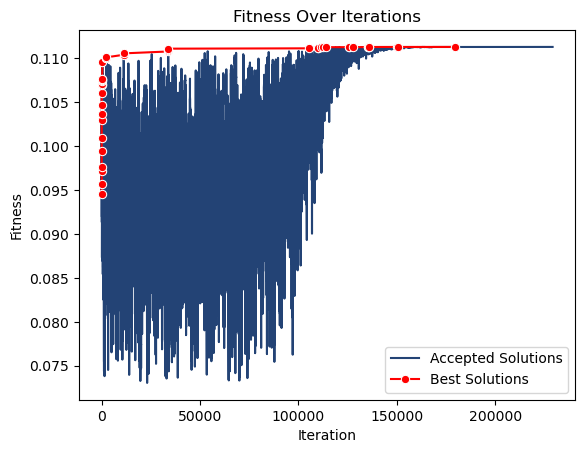

In [9]:
sns.lineplot(data=accepted_solutions, x='Iteration', y='Fitness', label='Accepted Solutions', color='#234375')
sns.lineplot(data=best_solutions, x='Iteration', y='Fitness', label='Best Solutions', marker='o', color='red')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness Over Iterations')
plt.legend()
plt.show()

## Print the solution and the best fitness

In [10]:

print("Total return:", best_result[3])
print("Weights:", best_result[0])

Total return: 0.11129591577318539
Weights: [0.39999475 0.         0.20000841 0.         0.39999683]
